In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras import layers,Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,concatenate
import os
from sklearn.model_selection import train_test_split

(253, 252, 3)


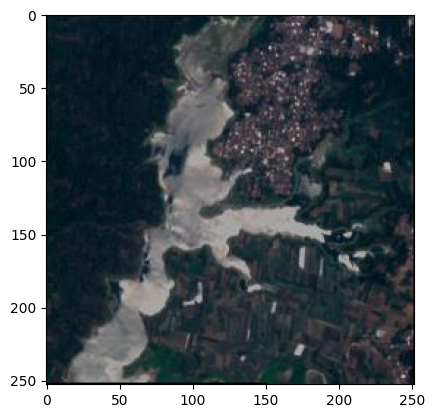

In [2]:
img=plt.imread("/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_10.jpg")
plt.imshow(img)
print(img.shape)

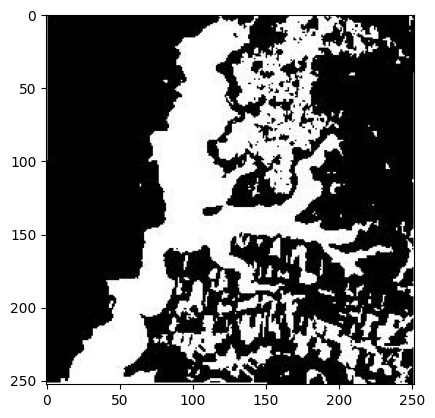

In [3]:
img=plt.imread("/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Masks/water_body_10.jpg")
plt.imshow(img)

In [4]:
img.shape

(253, 252, 3)

In [5]:
def load_imgs_images(dirpath,target):
    files=os.listdir(dirpath)
    for file in files:
        img_path=os.path.join(dirpath,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(128,128))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=img/255.0
        target.append(img)
    print("Done")
def load_imgs_masks(dirpath,target):
    files=os.listdir(dirpath)
    for file in files:
        img_path=os.path.join(dirpath,file)
        img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(128,128))
        img=np.expand_dims(img, axis=-1)
        #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=img/255.0
        target.append(img)
    print("Done")


In [6]:
images=[]
load_imgs_images("/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images",images)

Done


In [7]:
masks=[]
load_imgs_masks("/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Masks",masks)

Done


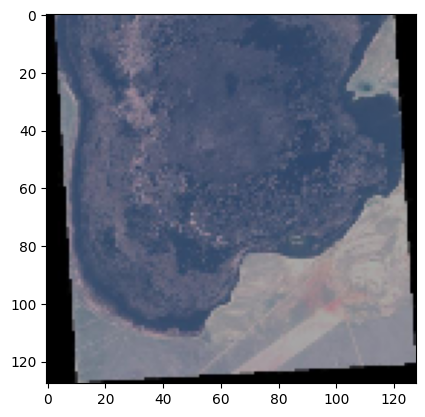

In [8]:
plt.imshow(images[0])

(128, 128, 1)


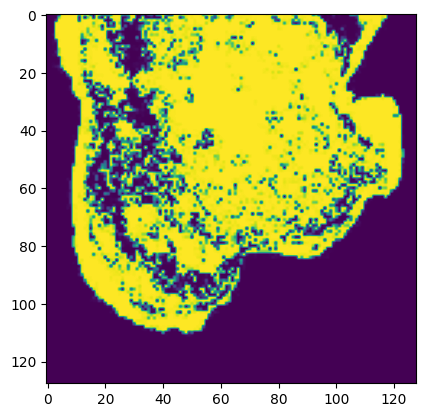

In [9]:
plt.imshow(masks[0])
print(masks[0].shape)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(np.array(images),np.array(masks),test_size=0.25,random_state=42)

In [11]:
def unet_model(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    u1 = layers.UpSampling2D((2, 2))(c4)
    u1 = layers.concatenate([u1, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u1)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u2 = layers.UpSampling2D((2, 2))(c5)
    u2 = layers.concatenate([u2, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u3 = layers.UpSampling2D((2, 2))(c6)
    u3 = layers.concatenate([u3, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)
    model = Model(inputs, outputs)
    return model
model = unet_model()

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=20,batch_size=8)

Epoch 1/20


I0000 00:00:1728391230.479918      70 service.cc:145] XLA service 0x7b42f0003c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728391230.479970      70 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728391230.479976      70 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/267 ━━━━━━━━━━━━━━━━━━━━ 1:32:36 21s/step - accuracy: 0.4859 - loss: 0.6907

I0000 00:00:1728391247.157898      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


267/267 ━━━━━━━━━━━━━━━━━━━━ 63s 159ms/step - accuracy: 0.6071 - loss: 0.5956 - val_accuracy: 0.6431 - val_loss: 0.5134
Epoch 2/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.6477 - loss: 0.4842 - val_accuracy: 0.6523 - val_loss: 0.4683
Epoch 3/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.6663 - loss: 0.4630 - val_accuracy: 0.6817 - val_loss: 0.4350
Epoch 4/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.6872 - loss: 0.4288 - val_accuracy: 0.7045 - val_loss: 0.4105
Epoch 5/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.7077 - loss: 0.3756 - val_accuracy: 0.7028 - val_loss: 0.3838
Epoch 6/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 25s 95ms/step - accuracy: 0.7238 - loss: 0.3534 - val_accuracy: 0.7172 - val_loss: 0.3800
Epoch 7/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - accuracy: 0.7181 - loss: 0.3537 - val_accuracy: 0.7284 - val_loss: 0.3420
Epoch 8/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - accuracy: 0.7209 - loss: 0.3494 - val_accura

In [14]:
model.save("unet.keras")

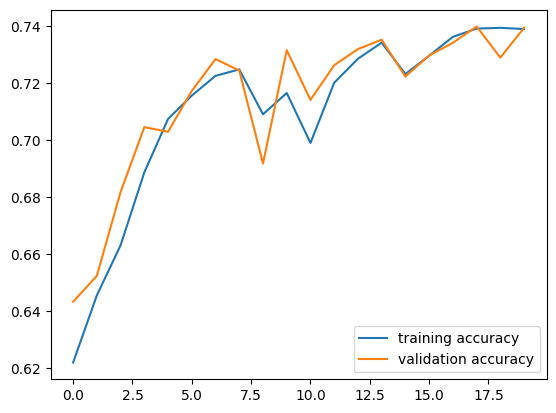

In [15]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

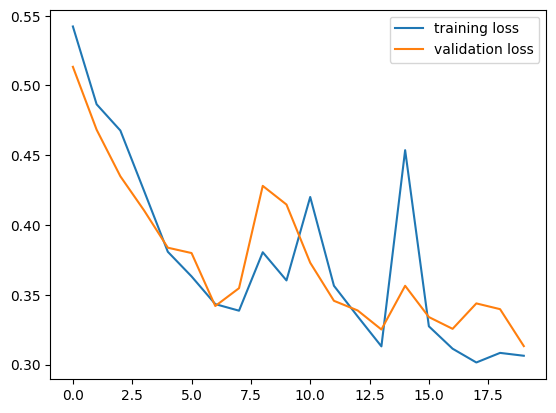

In [16]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()